In [1]:
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
import plotly.graph_objects as go # gráficos 3D
from scipy.stats import pearsonr # correlações de Pearson
import statsmodels.api as sm # estimação de modelos
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from sklearn.preprocessing import LabelEncoder # transformação de dados
from playsound import playsound # reprodução de sons
import pingouin as pg # outro modo para obtenção de matrizes de correlações
import emojis # inserção de emojis em gráficos
from statstests.process import stepwise # procedimento Stepwise
from statstests.tests import shapiro_francia # teste de Shapiro-Francia
from scipy.stats import boxcox # transformação de Box-Cox
from scipy.stats import norm # para plotagem da curva normal
from scipy import stats # utilizado na definição da função 'breusch_pagan_test'

In [2]:
# In[EXEMPLO 5]:
#############################################################################
#                        REGRESSÃO NÃO LINEAR MÚLTIPLA                      #
#                  EXEMPLO 5 - CARREGAMENTO DA BASE DE DADOS                #
#############################################################################

import pandas as pd

df = pd.read_excel('Estat.xlsx', sheet_name='GOP')
df

# Características das variáveis do dataset
df.info()

# Estatísticas univariadas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   peso               42 non-null     int64  
 1   QtdLocos           42 non-null     int64  
 2   vagões             42 non-null     int64  
 3   cOF                42 non-null     object 
 4   cOF2               42 non-null     float64
 5   cof_final          42 non-null     int64  
 6   Pressao_Media      42 non-null     int64  
 7   PSI_Aplicacao      42 non-null     int64  
 8   VelFinal           42 non-null     int64  
 9   Velocidade_Media   42 non-null     float64
 10  Velocidade_min     42 non-null     int64  
 11  Pressao_LASTValue  42 non-null     int64  
 12  Y                  42 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 4.4+ KB


,peso,QtdLocos,vagões,cOF2,cof_final,Pressao_Media,PSI_Aplicacao,VelFinal,Velocidade_Media,Velocidade_min,Pressao_LASTValue,Y
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,8161.214286,2.642857,99.952381,81.749588,3792.571429,97.714286,12.285714,22.523810,18.572143,14.119048,97.714286,72.975476
std,2462.531114,0.576847,28.857051,9.805507,460.828318,1.518756,1.518756,1.292343,1.620835,3.351027,1.518756,8.135557
min,2627.000000,1.000000,36.000000,59.470600,2990.000000,95.000000,9.000000,20.000000,14.770000,5.000000,95.000000,55.920000
25%,5885.750000,2.000000,74.000000,75.678675,3434.250000,96.000000,11.000000,21.250000,17.615000,13.000000,96.000000,66.897500
50%,8852.500000,3.000000,106.000000,83.366300,3772.000000,98.000000,12.000000,22.000000,18.725000,14.000000,98.000000,72.395000
75%,10371.500000,3.000000,123.000000,88.641975,4068.750000,99.000000,14.000000,24.000000,19.757500,16.750000,99.000000,78.227500
max,10569.000000,4.000000,137.000000,98.447600,4687.000000,101.000000,15.000000,25.000000,21.720000,20.000000,101.000000,93.010000


In [3]:
#df_back = pd.read_excel('Estat2.xlsx')

In [4]:
#df = df_back 

In [5]:
df = df.sort_values(by='Y')

In [6]:
df

,peso,QtdLocos,vagões,cOF,cOF2,cof_final,Pressao_Media,PSI_Aplicacao,VelFinal,Velocidade_Media,Velocidade_min,Pressao_LASTValue,Y
27,10375,4,107,"96,9626",96.9626,4522,96,14,23,20.21,17,96,55.92
2,5055,3,85,"59,4706",59.4706,3045,101,9,24,19.72,15,101,56.63
4,10361,3,134,"77,3209",77.3209,3880,99,11,24,21.21,19,99,61.87
17,10337,3,105,"98,4476",98.4476,4687,98,12,23,19.36,17,98,62.98
34,5540,2,73,"75,8904",75.8904,3808,99,11,24,19.86,15,99,63.60
9,6175,2,69,"89,4928",89.4928,4678,99,11,25,20.00,13,99,64.30
13,6125,2,99,"61,8687",61.8687,3267,100,10,25,18.67,10,100,64.40
5,10044,3,134,"74,9552",74.9552,3413,98,12,22,17.93,14,98,64.41
20,10559,3,125,84.472,84.4720,3597,96,14,21,16.66,13,96,64.45
6,10519,3,137,"76,7810",76.7810,3303,97,13,21,18.85,16,97,66.51


In [7]:
df = df.drop(15)
df = df.drop('cOF', axis=1)
df = df.drop('cOF2', axis=1)
df = df.drop('cof_final', axis=1)
df

,peso,QtdLocos,vagões,Pressao_Media,PSI_Aplicacao,VelFinal,Velocidade_Media,Velocidade_min,Pressao_LASTValue,Y
27,10375,4,107,96,14,23,20.21,17,96,55.92
2,5055,3,85,101,9,24,19.72,15,101,56.63
4,10361,3,134,99,11,24,21.21,19,99,61.87
17,10337,3,105,98,12,23,19.36,17,98,62.98
34,5540,2,73,99,11,24,19.86,15,99,63.60
9,6175,2,69,99,11,25,20.00,13,99,64.30
13,6125,2,99,100,10,25,18.67,10,100,64.40
5,10044,3,134,98,12,22,17.93,14,98,64.41
20,10559,3,125,96,14,21,16.66,13,96,64.45
6,10519,3,137,97,13,21,18.85,16,97,66.51


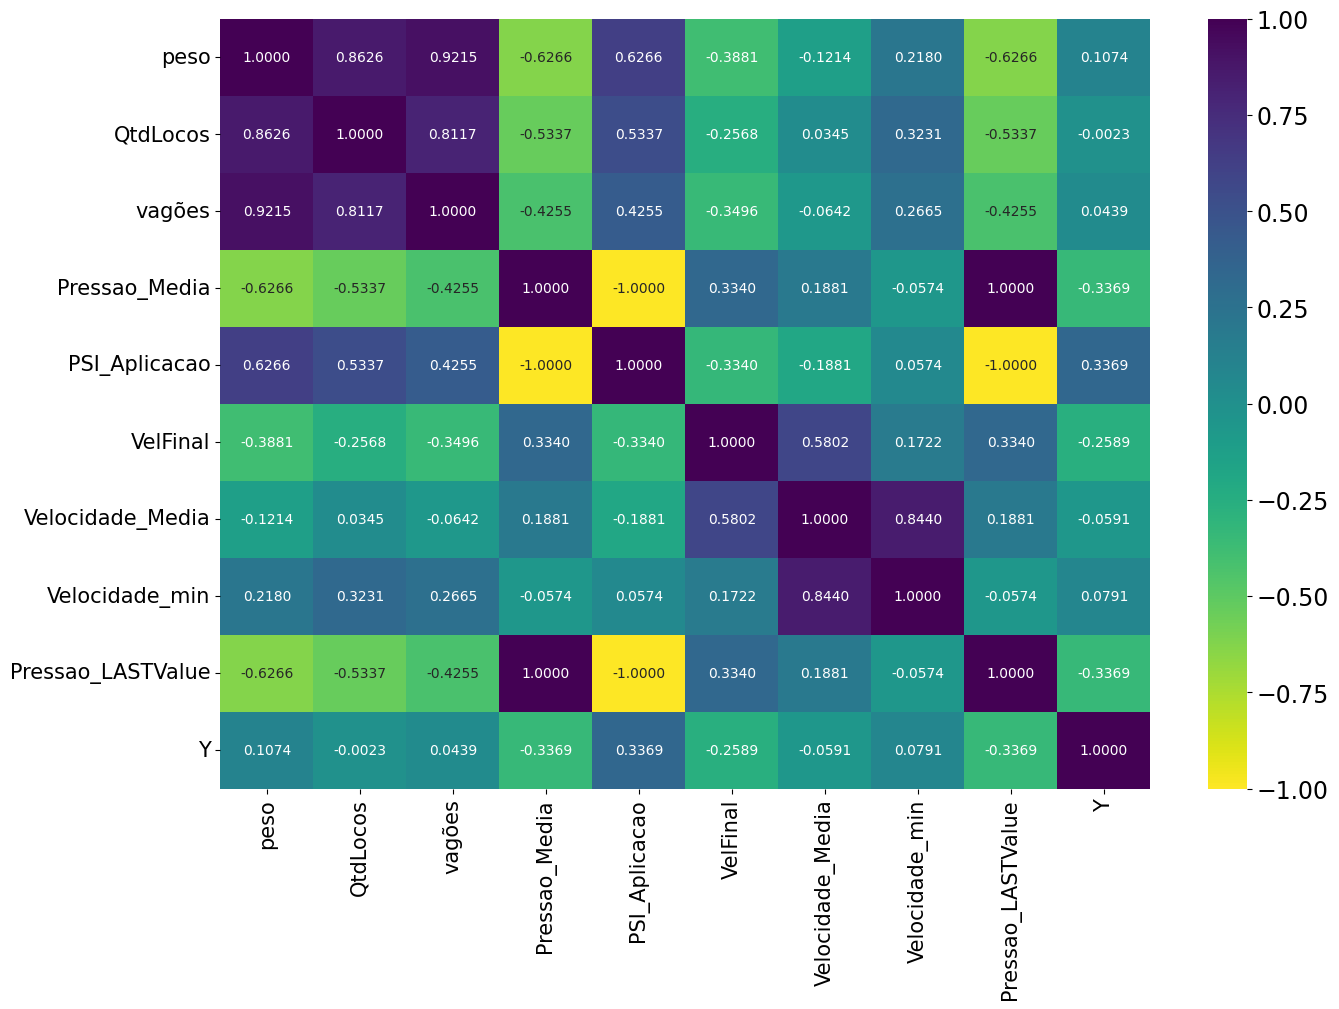

In [8]:
# In[5.1]: Matriz de correlações

#correlation_matrix = df.iloc[:,1:6].corr()
correlation_matrix = df.corr()

# Mapa de calor com as correlações entre todas as variáveis quantitativas
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".4f",
                      cmap=plt.cm.viridis_r,
                      annot_kws={'size': 10}, vmin=-1, vmax=1)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=15)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=17)
plt.show()



In [9]:
correlation_matrix

,peso,QtdLocos,vagões,Pressao_Media,PSI_Aplicacao,VelFinal,Velocidade_Media,Velocidade_min,Pressao_LASTValue,Y
peso,1.000000,0.862638,0.921518,-0.626629,0.626629,-0.388115,-0.121396,0.217979,-0.626629,0.107416
QtdLocos,0.862638,1.000000,0.811726,-0.533668,0.533668,-0.256797,0.034474,0.323116,-0.533668,-0.002277
vagões,0.921518,0.811726,1.000000,-0.425494,0.425494,-0.349627,-0.064242,0.266482,-0.425494,0.043930
Pressao_Media,-0.626629,-0.533668,-0.425494,1.000000,-1.000000,0.334035,0.188124,-0.057366,1.000000,-0.336916
PSI_Aplicacao,0.626629,0.533668,0.425494,-1.000000,1.000000,-0.334035,-0.188124,0.057366,-1.000000,0.336916
VelFinal,-0.388115,-0.256797,-0.349627,0.334035,-0.334035,1.000000,0.580234,0.172210,0.334035,-0.258876
Velocidade_Media,-0.121396,0.034474,-0.064242,0.188124,-0.188124,0.580234,1.000000,0.843953,0.188124,-0.059057
Velocidade_min,0.217979,0.323116,0.266482,-0.057366,0.057366,0.172210,0.843953,1.000000,-0.057366,0.079123
Pressao_LASTValue,-0.626629,-0.533668,-0.425494,1.000000,-1.000000,0.334035,0.188124,-0.057366,1.000000,-0.336916
Y,0.107416,-0.002277,0.043930,-0.336916,0.336916,-0.258876,-0.059057,0.079123,-0.336916,1.000000


In [10]:
df.info()


# Estatísticas univariadas
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 27 to 41
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   peso               41 non-null     int64  
 1   QtdLocos           41 non-null     int64  
 2   vagões             41 non-null     int64  
 3   Pressao_Media      41 non-null     int64  
 4   PSI_Aplicacao      41 non-null     int64  
 5   VelFinal           41 non-null     int64  
 6   Velocidade_Media   41 non-null     float64
 7   Velocidade_min     41 non-null     int64  
 8   Pressao_LASTValue  41 non-null     int64  
 9   Y                  41 non-null     float64
dtypes: float64(2), int64(8)
memory usage: 3.5 KB


,peso,QtdLocos,vagões,Pressao_Media,PSI_Aplicacao,VelFinal,Velocidade_Media,Velocidade_min,Pressao_LASTValue,Y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,8106.292683,2.634146,99.341463,97.731707,12.268293,22.487805,18.550000,14.097561,97.731707,73.130488
std,2466.942584,0.581210,28.939255,1.533369,1.533369,1.286895,1.634526,3.389726,1.533369,8.173588
min,2627.000000,1.000000,36.000000,95.000000,9.000000,20.000000,14.770000,5.000000,95.000000,55.920000
25%,5806.000000,2.000000,74.000000,96.000000,11.000000,21.000000,17.610000,13.000000,96.000000,67.730000
50%,8662.000000,3.000000,105.000000,98.000000,12.000000,22.000000,18.680000,14.000000,98.000000,72.930000
75%,10361.000000,3.000000,123.000000,99.000000,14.000000,24.000000,19.770000,17.000000,99.000000,78.390000
max,10569.000000,4.000000,137.000000,101.000000,15.000000,25.000000,21.720000,20.000000,101.000000,93.010000


C:\Users\leona\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x1000 with 0 Axes>

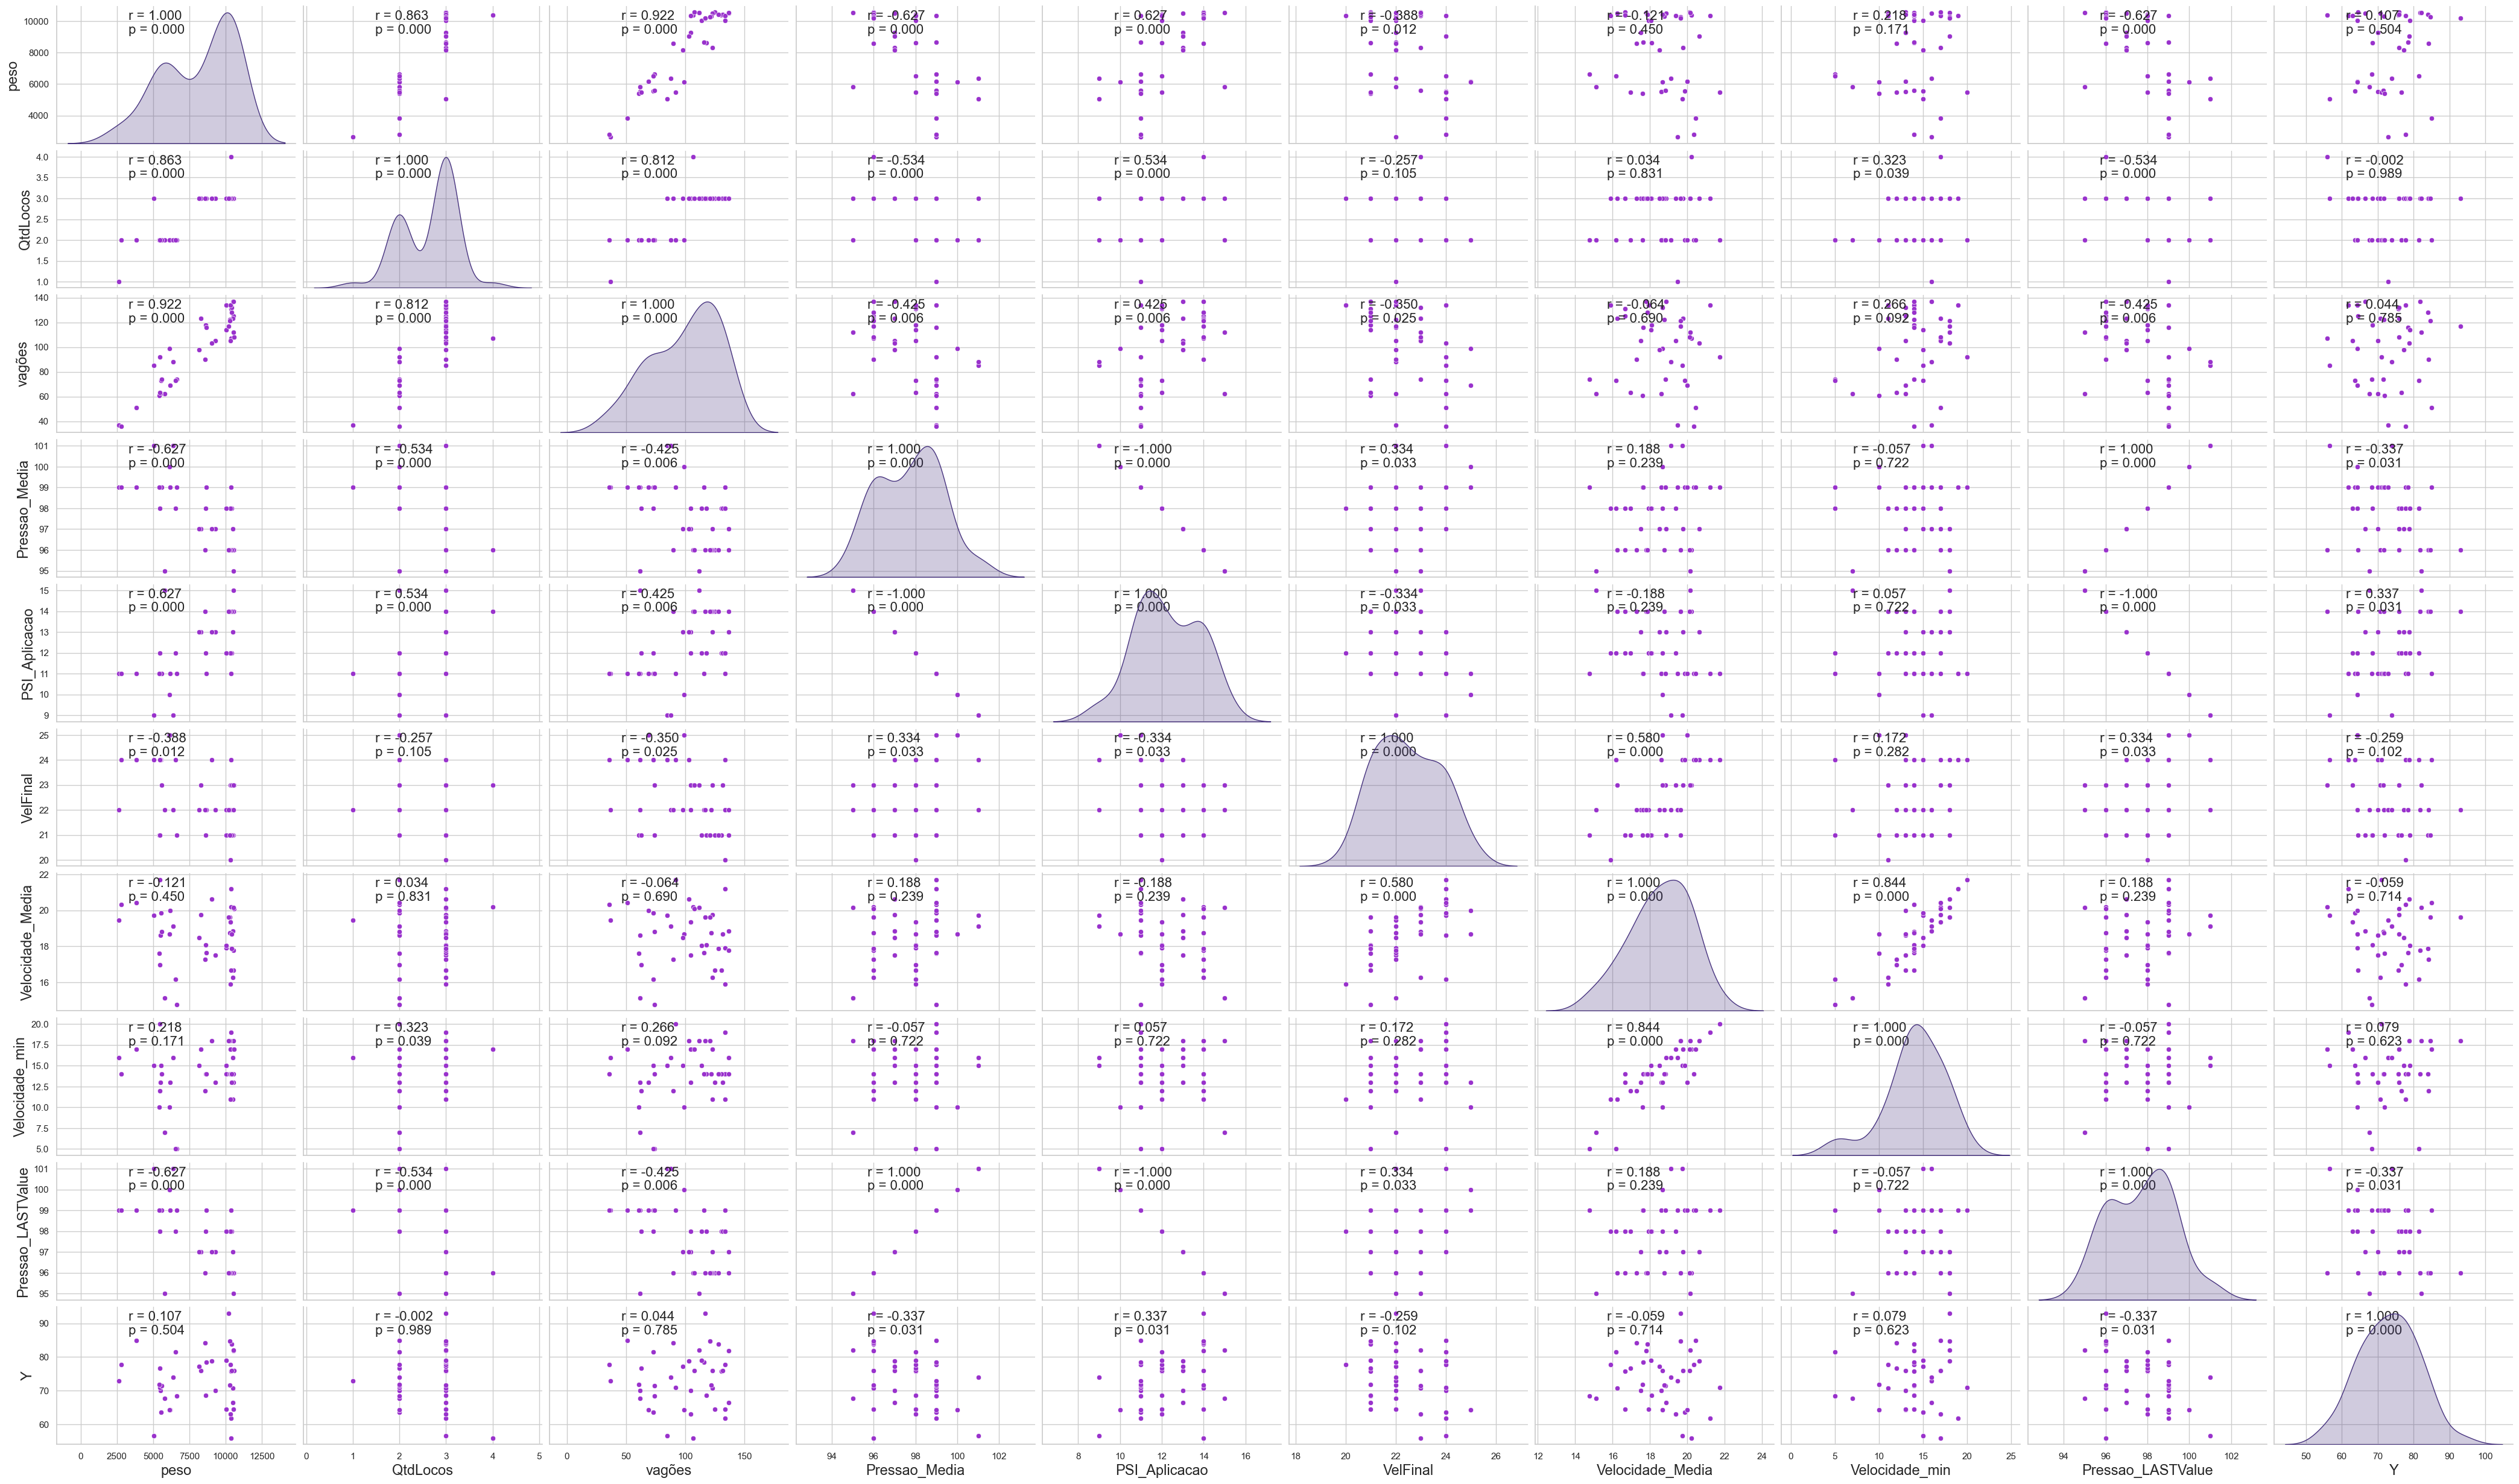

In [11]:
# In[5.4]: Distribuições das variáveis, scatters, valores das correlações e
#suas respectivas significâncias

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.3f}".format(r),
                xy=(.30, .9), xycoords=ax.transAxes, fontsize=16)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.30, .8), xycoords=ax.transAxes, fontsize=16)

# Configuração do gráfico
sns.set(style="whitegrid", palette="viridis")

plt.figure(figsize=(20,10))
graph = sns.pairplot(df, diag_kind="kde",
                     plot_kws={"color": "darkorchid"},
                     height=2.5, aspect=1.7)
graph.map(corrfunc)
for ax in graph.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize=17)
    ax.set_ylabel(ax.get_ylabel(), fontsize=17)
plt.show()


In [12]:
# Selecionando todas as colunas exceto 'retorno'
variaveis = '+'.join(df.columns.difference(['Y']))

# Estimando o Modelo de Regressão Múltipla com todas as colunas
modelo = sm.OLS.from_formula(f'Y ~ {variaveis}', df).fit()

# Parâmetros do 'modelo'
modelo.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1.408
Date:                Sun, 16 Feb 2025   Prob (F-statistic):              0.235
Time:                        22:01:18   Log-Likelihood:                -138.45
No. Observations:                  41   AIC:                             292.9
Df Residuals:                      33   BIC:                             306.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0319      0.010      3.278      0.002       0.012       0.052
PSI_Aplicacao         3.1277      1.108      2.822      0.008       0.873       5.382
Pressao_LASTValue     0.3854      0.145      2.665      0.012       0.091       0.680
Pressao_Media         0.3854      0.145      2.665      0.012       0.091       0.680
QtdLocos             -5.6601      4.446     -1.273      0.212     -14.706       3.386
VelFinal             -1.4366      1.745     -0.823      0.416      -4.986       2.113
Velocidade_Media     -0.1320      2.806     -0.047      0.963      -5.841       5.577
Velocidade_min        0.5653      1.177      0.480      0.634      -1.829       2.960
peso              -1.581e-05      0.002     -0.008      0.993      -0.004       0.004
vagões                0.0123      0.132      0.094      0.926      -0.256       0.280
==============================================================================
Omnibus:                        0.659   Durbin-Watson:                   0.413
Prob(Omnibus):                  0.719   Jarque-Bera (JB):                0.696
Skew:                           0.028   Prob(JB):                        0.706
Kurtosis:                       2.364   Cond. No.                     5.09e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [13]:
# In[5.6]: Procedimento Stepwise

# Carregamento da função 'stepwise' do pacote 'statstests.process'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

from statstests.process import stepwise

# Estimação do modelo por meio do procedimento Stepwise
modelo_step = stepwise(modelo, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 Y ~ Q('PSI_Aplicacao') + Q('Pressao_LASTValue') + Q('Pressao_Media') + Q('QtdLocos') + Q('VelFinal') + Q('Velocidade_Media') + Q('Velocidade_min') + Q('peso') + Q('vagões')

 Discarding atribute "Q('peso')" with p-value equal to 0.9934851649619946 

Estimating model...: 
 Y ~ Q('PSI_Aplicacao') + Q('Pressao_LASTValue') + Q('Pressao_Media') + Q('QtdLocos') + Q('VelFinal') + Q('Velocidade_Media') + Q('Velocidade_min') + Q('vagões')

 Discarding atribute "Q('Velocidade_Media')" with p-value equal to 0.9623474214130039 

Estimating model...: 
 Y ~ Q('PSI_Aplicacao') + Q('Pressao_LASTValue') + Q('Pressao_Media') + Q('QtdLocos') + Q('VelFinal') + Q('Velocidade_min') + Q('vagões')

 Discarding atribute "Q('vagões')" with p-value equal to 0.8689262387326081 

Estimating model...: 
 Y ~ Q('PSI_Aplicacao') + Q('Pressao_LASTValue') + Q('Pressao_Media') + Q('QtdLocos') + Q('VelFinal') + Q('Velocidade_min')

 Discarding atribute "Q('Velocidade_min')" wi

In [14]:
# In[5.7]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Wilk (n < 30)
#from scipy.stats import shapiro
#shapiro(modelo_step.resid)

# Teste de Shapiro-Francia (n >= 30)
# Carregamento da função 'shapiro_francia' do pacote 'statstests.tests'
# Autores do pacote: Luiz Paulo Fávero e Helder Prado Santos
# https://stats-tests.github.io/statstests/

from statstests.tests import shapiro_francia

# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9765193687163007
statistics z  :  0.08890628580921928
p-value  :  0.4645781939921622
Statistics W=0.97652, p-value=0.464578
Não se rejeita H0 - Distribuição aderente à normalidade


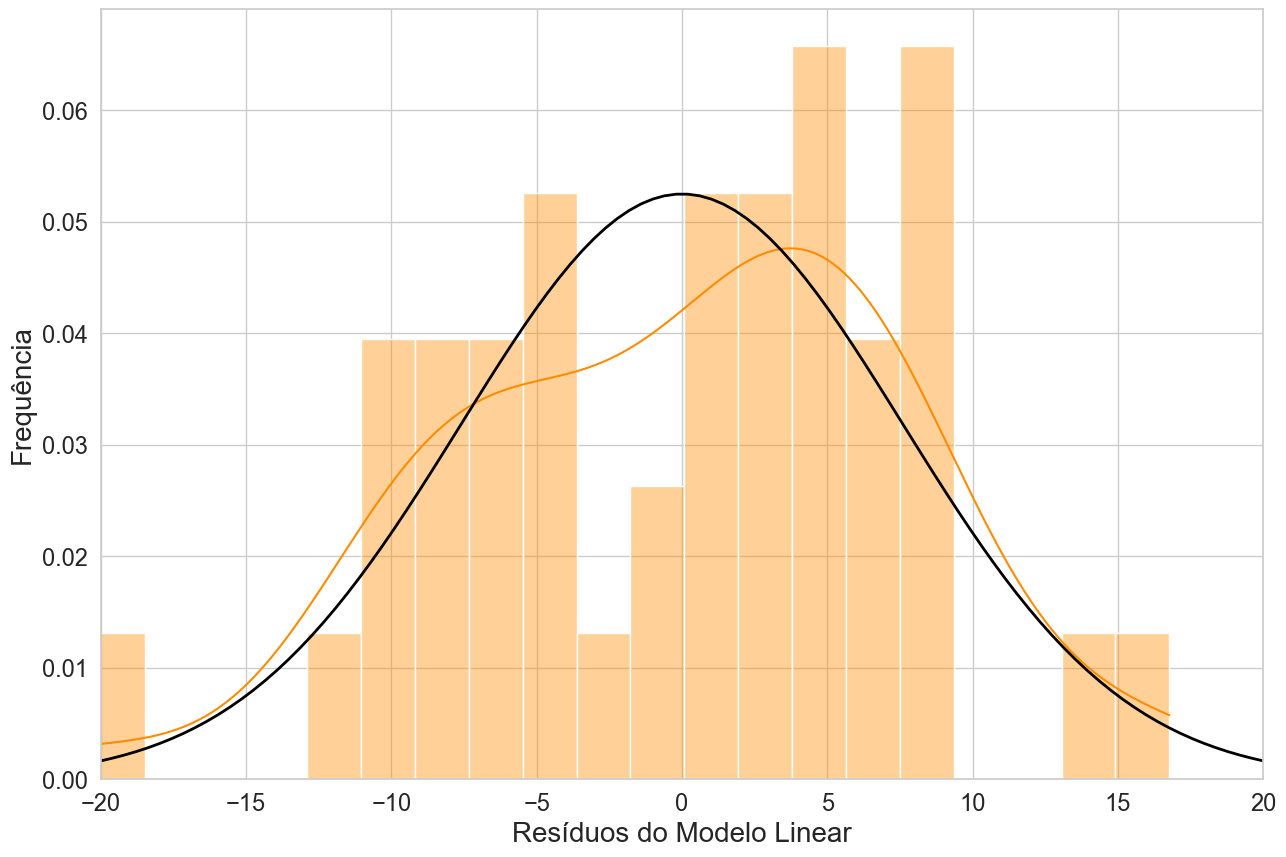

In [15]:
# In[5.8]: Plotando os resíduos do 'modelo_step' e acrescentando
#uma curva normal teórica para comparação entre as distribuições
# Kernel density estimation (KDE) - forma não-paramétrica para estimação da
#função densidade de probabilidade de determinada variável

from scipy.stats import norm

# Calcula os valores de ajuste da distribuição normal
(mu, sigma) = norm.fit(modelo_step.resid)

# Gráfico propriamente dito
plt.figure(figsize=(15,10))
sns.histplot(modelo_step.resid, bins=20, kde=True, stat="density",
             color='darkorange', alpha=0.4)
plt.xlim(-20, 20)
x = np.linspace(-20, 20, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Resíduos do Modelo Linear', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [16]:
# In[5.9]: Transformação de Box-Cox

# Para o cálculo do lambda de Box-Cox
from scipy.stats import boxcox

# 'yast' é uma variável que traz os valores transformados (Y*)
# 'lmbda' é o lambda de Box-Cox
yast, lmbda = boxcox(df['Y'])

print("Lambda: ",lmbda)

Lambda:  0.932274855905822


In [17]:
# In[5.10]: Inserindo o lambda de Box-Cox no dataset para a estimação de um
#novo modelo

df['bc_retorno'] = yast
df

# Verificação do cálculo, apenas para fins didáticos
df['bc_retorno2'] = ((df['Y'])**(lmbda) - 1) / (lmbda)
df

del df['bc_retorno2']


In [18]:
# Selecionando todas as colunas exceto 'retorno'
variaveis = '+'.join(df.columns.difference(['bc_retorno','Y']))

# Estimando o Modelo de Regressão Múltipla com todas as colunas
modelo_bc = sm.OLS.from_formula(f'bc_retorno ~ {variaveis}', df).fit()

# Parâmetros do 'modelo_bc'
modelo_bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             bc_retorno   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     1.413
Date:                Sun, 16 Feb 2025   Prob (F-statistic):              0.233
Time:                        22:01:19   Log-Likelihood:                -126.53
No. Observations:                  41   AIC:                             269.1
Df Residuals:                      33   BIC:                             282.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0243      0.007      3.330      0.002       0.009       0.039
PSI_Aplicacao         2.3667      0.829      2.856      0.007       0.681       4.052
Pressao_LASTValue     0.3020      0.108      2.793      0.009       0.082       0.522
Pressao_Media         0.3020      0.108      2.793      0.009       0.082       0.522
QtdLocos             -4.2770      3.324     -1.287      0.207     -11.041       2.487
VelFinal             -1.0759      1.305     -0.825      0.415      -3.730       1.578
Velocidade_Media     -0.1033      2.098     -0.049      0.961      -4.372       4.165
Velocidade_min        0.4235      0.880      0.481      0.633      -1.367       2.214
peso                -9.5e-06      0.001     -0.007      0.995      -0.003       0.003
vagões                0.0096      0.098      0.097      0.923      -0.191       0.210
==============================================================================
Omnibus:                        0.695   Durbin-Watson:                   0.413
Prob(Omnibus):                  0.706   Jarque-Bera (JB):                0.714
Skew:                           0.018   Prob(JB):                        0.700
Kurtosis:                       2.355   Cond. No.                     5.09e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [19]:
# In[5.12]: Aplicando o procedimento Stepwise no 'modelo_bc"

modelo_step_bc = stepwise(modelo_bc, pvalue_limit=0.05)

# Note que a variável 'disclosure' retorna ao modelo na forma funcional
#não linear!


Regression type: OLS 

Estimating model...: 
 bc_retorno ~ Q('PSI_Aplicacao') + Q('Pressao_LASTValue') + Q('Pressao_Media') + Q('QtdLocos') + Q('VelFinal') + Q('Velocidade_Media') + Q('Velocidade_min') + Q('peso') + Q('vagões')

 Discarding atribute "Q('peso')" with p-value equal to 0.9947659363442525 

Estimating model...: 
 bc_retorno ~ Q('PSI_Aplicacao') + Q('Pressao_LASTValue') + Q('Pressao_Media') + Q('QtdLocos') + Q('VelFinal') + Q('Velocidade_Media') + Q('Velocidade_min') + Q('vagões')

 Discarding atribute "Q('Velocidade_Media')" with p-value equal to 0.960560812132921 

Estimating model...: 
 bc_retorno ~ Q('PSI_Aplicacao') + Q('Pressao_LASTValue') + Q('Pressao_Media') + Q('QtdLocos') + Q('VelFinal') + Q('Velocidade_min') + Q('vagões')

 Discarding atribute "Q('vagões')" with p-value equal to 0.8616926502608402 

Estimating model...: 
 bc_retorno ~ Q('PSI_Aplicacao') + Q('Pressao_LASTValue') + Q('Pressao_Media') + Q('QtdLocos') + Q('VelFinal') + Q('Velocidade_min')

 Discardin

In [20]:
# In[5.13]: Verificando a normalidade dos resíduos do 'modelo_step_bc'

# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(modelo_step_bc.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9759712505721929
statistics z  :  0.13198684435583166
p-value  :  0.44749734869663893
Statistics W=0.97597, p-value=0.447497
Não se rejeita H0 - Distribuição aderente à normalidade


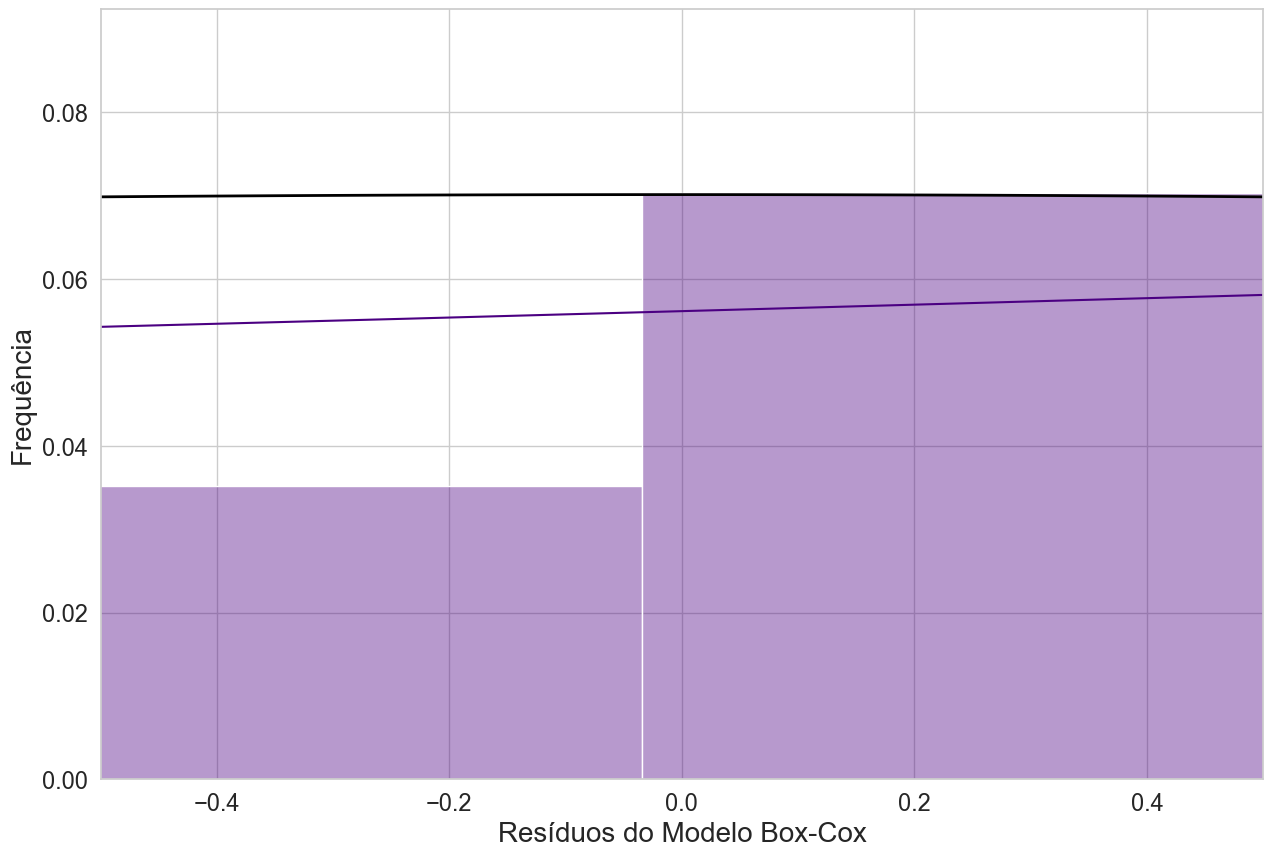

In [21]:
# In[5.14]: Plotando os novos resíduos do 'modelo_step_bc' e
#acrescentando uma curva normal teórica para comparação entre as distribuições

from scipy.stats import norm

# Calcula os valores de ajuste da distribuição normal
(mu, sigma) = norm.fit(modelo_step_bc.resid)

# Gráfico propriamente dito
plt.figure(figsize=(15,10))
sns.histplot(modelo_step_bc.resid, bins=20, kde=True, stat="density",
             color='indigo', alpha=0.4)
plt.xlim(-0.5, 0.5)
x = np.linspace(-0.5, 0.5, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Resíduos do Modelo Box-Cox', fontsize=20)
plt.ylabel('Frequência', fontsize=20)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.show()

In [22]:
modelo_step_bc.resid

27   -15.280808
2     -8.035824
4     -6.743125
17    -7.245098
34    -5.436020
9     -4.907821
13    -3.491480
5     -6.165770
20    -8.817434
6     -5.924587
32    -7.688855
3     -1.814249
18    -3.057524
24    -3.302713
10    -0.583384
12    -4.126326
11     0.128722
7      0.510743
14    -3.339781
0      0.772808
1      1.573444
28     5.017758
21     2.383594
16     1.087433
22    -0.246024
35     2.480559
30     2.972668
36     2.071425
19     5.125682
33     3.822000
31     5.646806
37     3.232857
25     4.722562
23     6.565438
40     4.187906
29     3.054745
8      5.722684
39     5.900462
38     6.292934
26    10.493351
41    12.440244
dtype: float64

In [23]:
# In[5.15]: Resumo dos dois modelos obtidos pelo procedimento Stepwise
#(linear e com Box-Cox)

summary_col([modelo_step, modelo_step_bc],
            model_names=["STEPWISE","STEPWISE BOX-COX"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

# CUIDADO!!! OS PARÂMETROS NÃO SÃO DIRETAMENTE COMPARÁVEIS!

,STEPWISE,STEPWISE BOX-COX
Intercept,0.0227***,0.0173***
,(0.0061),(0.0046)
Q('PSI_Aplicacao'),2.2602***,1.7145***
,(0.7141),(0.5343)
Q('Pressao_LASTValue'),0.2322***,0.1868***
,(0.0452),(0.0338)
Q('Pressao_Media'),0.2322***,0.1868***
,(0.0452),(0.0338)
R-squared,0.1135,0.1131
R-squared Adj.,0.0908,0.0904


In [24]:
# In[5.18]: Salvando os fitted values de 'modelo_step' e
#'modelo_step_bc'

df['yhat_step'] = modelo_step.fittedvalues
df['yhat_step_bc'] = (modelo_step_bc.fittedvalues
                                        * lmbda + 1) ** (1 / lmbda)

# Visualizando os dois fitted values dos modelos 'modelo_step' e
#'modelo_step_bc' no dataset
df[['Y','yhat_step','yhat_step_bc']]


,Y,yhat_step,yhat_step_bc
27,55.92,76.240506,76.209894
2,56.63,67.260877,67.255630
4,61.87,70.852728,70.828212
17,62.98,72.648654,72.619130
34,63.60,70.852728,70.828212
9,64.30,70.852728,70.828212
13,64.40,69.056802,69.040356
5,64.41,72.648654,72.619130
20,64.45,76.240506,76.209894
6,66.51,74.444580,74.413045


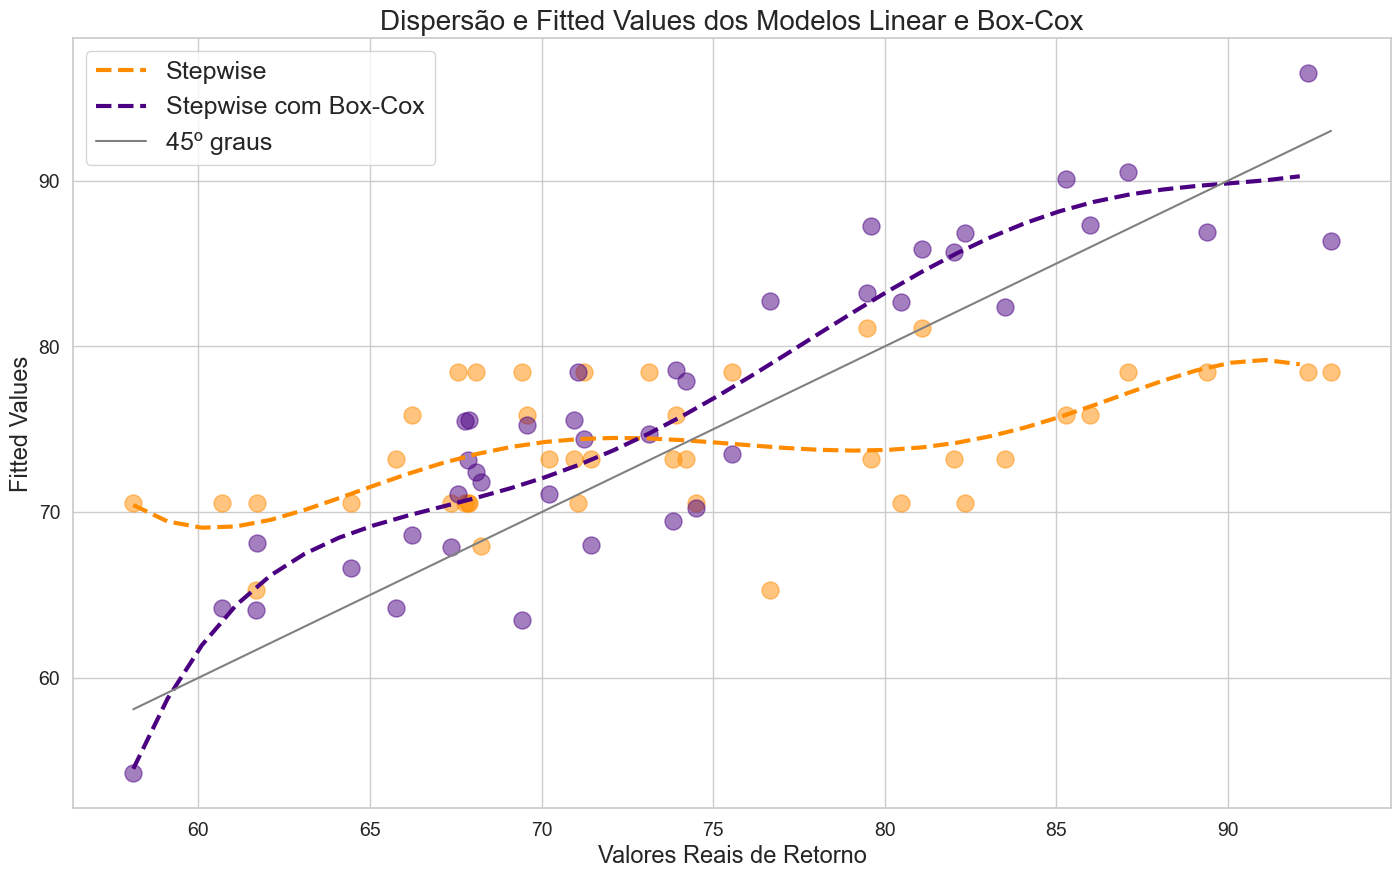

In [56]:
# In[5.19]: Ajustes dos modelos: valores previstos (fitted values) X valores reais

from scipy.optimize import curve_fit

df = pd.read_excel('Pasta1.xlsx')

def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

xdata = df['Y']
ydata_linear = df['yhat_step']
ydata_bc = df['yhat_step_bc']

plt.figure(figsize=(17,10))

popt, _ = curve_fit(objective, xdata, ydata_linear)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='darkorange', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_bc)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='indigo', linewidth=3)

plt.plot(xdata,xdata, color='gray', linestyle='-')
plt.scatter(xdata,ydata_linear, alpha=0.5, s=150, color='darkorange')
plt.scatter(xdata,ydata_bc, alpha=0.5, s=150, color='indigo')
plt.title('Dispersão e Fitted Values dos Modelos Linear e Box-Cox',
          fontsize=20)
plt.xlabel('Valores Reais de Retorno', fontsize=17)
plt.ylabel('Fitted Values', fontsize=17)
plt.legend(['Stepwise','Stepwise com Box-Cox','45º graus'], fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



In [26]:
"---------------------------------"

'---------------------------------'

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponha que seu dataframe se chame df
# Carregar o seu dataframe
# df = pd.read_csv('seu_arquivo.csv') 

# Definir o tamanho da figura
plt.figure(figsize=(10, 6))

# Gerar o boxplot de todas as variáveis numéricas
sns.boxplot(data=df_empresas_back.select_dtypes(include='number'))

# Ajustar a exibição dos rótulos das variáveis no eixo x
plt.xticks(rotation=90)

# Exibir o gráfico
plt.show()

NameError: name 'df_empresas_back' is not defined

<Figure size 1000x600 with 0 Axes>